In [2]:
import pandas as pd
import mysql.connector
import plotly.express as px

In [3]:
mydb=mysql.connector.connect(host="localhost",user="root",password="root",database="dataanalytics")

In [22]:
df = pd.read_sql("select * from superstore",mydb)
df

C:\Users\lenovo\AppData\Local\Temp\ipykernel_5816\1315231210.py:1: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0         1  CA-2013-152156  2013-11-09  2013-11-12    Second Class   
1         2  CA-2013-152156  2013-11-09  2013-11-12    Second Class   
2         3  CA-2013-138688  2013-06-13  2013-06-17    Second Class   
3         4  US-2012-108966  2012-10-11  2012-10-18  Standard Class   
4         5  US-2012-108966  2012-10-11  2012-10-18  Standard Class   
...     ...             ...         ...         ...             ...   
9689   9990  CA-2011-110422  2011-01-22  2011-01-24    Second Class   
9690   9991  CA-2014-121258  2014-02-27  2014-03-04  Standard Class   
9691   9992  CA-2014-121258  2014-02-27  2014-03-04  Standard Class   
9692   9993  CA-2014-121258  2014-02-27  2014-03-04  Standard Class   
9693   9994  CA-2014-119914  2014-05-05  2014-05-10    Second Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520       Claire Gute   Consumer  United States        Henderson   
1       CG-12520       Claire Gute   Consumer  United States        Henderson   
2       DV-13045   Darrin Van Huff  Corporate  United States      Los Angeles   
3       SO-20335    Sean O'Donnell   Consumer  United States  Fort Lauderdale   
4       SO-20335    Sean O'Donnell   Consumer  United States  Fort Lauderdale   
...          ...               ...        ...            ...              ...   
9689    TB-21400  Tom Boeckenhauer   Consumer  United States            Miami   
9690    DB-13060       Dave Brooks   Consumer  United States       Costa Mesa   
9691    DB-13060       Dave Brooks   Consumer  United States       Costa Mesa   
9692    DB-13060       Dave Brooks   Consumer  United States       Costa Mesa   
9693    CC-12220      Chris Cortes   Consumer  United States      Westminster   

      ... Postal Code  Region       Product ID         Category Sub-Category  \
0     ...       42420   South  FUR-BO-10001798        Furniture    Bookcases   
1     ...       42420   South  FUR-CH-10000454        Furniture       Chairs   
2     ...       90036    West  OFF-LA-10000240  Office Supplies       Labels   
3     ...       33311   South  FUR-TA-10000577        Furniture       Tables   
4     ...       33311   South  OFF-ST-10000760  Office Supplies      Storage   
...   ...         ...     ...              ...              ...          ...   
9689  ...       33180   South  FUR-FU-10001889        Furniture  Furnishings   
9690  ...       92627    West  FUR-FU-10000747        Furniture  Furnishings   
9691  ...       92627    West  TEC-PH-10003645       Technology       Phones   
9692  ...       92627    West  OFF-PA-10004041  Office Supplies        Paper   
9693  ...       92683    West  OFF-AP-10002684  Office Supplies   Appliances   

                                           Product Name     Sales  Quantity  \
0                     Bush Somerset Collection Bookcase  261.9600         2   
1     Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400         3   
2     Self-Adhesive Address Labels for Typewriters b...   14.6200         2   
3         Bretford CR4500 Series Slim Rectangular Table  957.5775         5   
4                        Eldon Fold 'N Roll Cart System   22.3680         2   
...                                                 ...       ...       ...   
9689                             Ultra Door Pull Handle   25.2480         3   
9690  Tenex B1-RE Series Chair Mats for Low Pile Car...   91.9600         2   
9691                              Aastra 57i VoIP phone  258.5760         2   
9692  It's Hot Message Books with Stickers, 2 3/4" x...   29.6000         4   
9693  Acco 7-Outlet Masterpiece Power Center, Wihtou...  243.1600         2   

      Discount    Profit  
0         0.00   41.9136  
1         0.00  219.5820  
2         0.00    6.8714  
3         0.45 -383.0310  
4         0.20    2.5164  
...        ...       ...  
9689      0.20    4.1028  
9690      0.00   15.6332  
9691      0.20   19.3932  

### Sales Analysis

In [4]:
df1=pd.read_sql('''with temp as
						(select date_format(`Ship Date`,'%Y-%m') as date, round(sum(Sales),2) as total
						from superstore
						group by date order by date)
                    select *, round((sum(total) over(order by date)),2) as roll_total from temp''',mydb)
df1.head()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_5816\3571835876.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df1=pd.read_sql('''with temp as


date     total  roll_total
0  2011-01  12295.02    12295.02
1  2011-02   5943.91    18238.93
2  2011-03  50510.64    68749.57
3  2011-04  30250.97    99000.54
4  2011-05  22460.59   121461.13

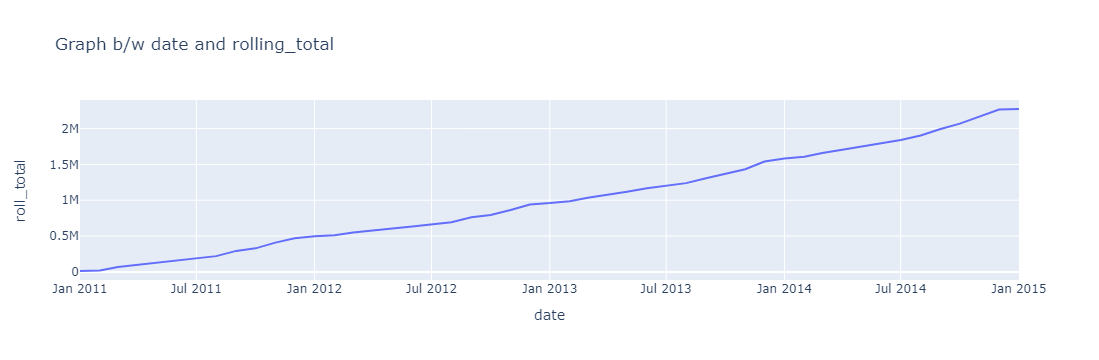

In [5]:
fig=px.line(df1,x="date",y="roll_total",title="Graph b/w date and rolling_total")
fig.show()

In [8]:
df2=pd.read_sql('''select Region,Category ,round(sum(Sales),2) as total 
                        from superstore group by Region,Category;''',mydb)
df2

C:\Users\lenovo\AppData\Local\Temp\ipykernel_5816\1476622233.py:1: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



Region         Category      total
0     South        Furniture  116273.14
1      West  Office Supplies  213125.18
2     South  Office Supplies  123979.92
3      West        Furniture  248450.23
4      West       Technology  251895.93
5   Central  Office Supplies  164616.20
6      East        Furniture  205540.35
7      East  Office Supplies  201781.62
8   Central       Technology  170401.53
9   Central        Furniture  162783.14
10     East       Technology  264872.08
11    South       Technology  148730.52

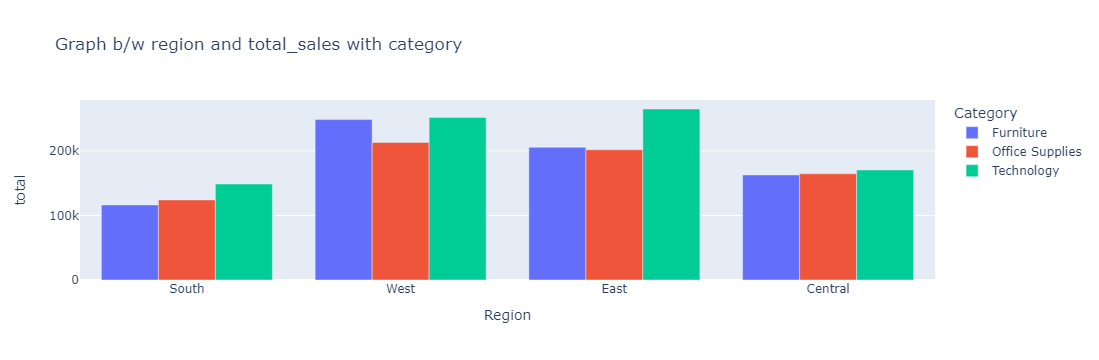

In [9]:
fig=px.bar(df2,x="Region",y="total",color="Category",barmode='group',title="Graph b/w region and total_sales with category")
fig.show()

### Profit Analysis

In [24]:
df3 = pd.read_sql('''select `Product Name`, round(sum(Profit) / sum(Sales) * 100,2) as profit_margin
                    from superstore group by `Product Name` ''',mydb)
df3

C:\Users\lenovo\AppData\Local\Temp\ipykernel_5816\432605074.py:1: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



Product Name  profit_margin
0                     Bush Somerset Collection Bookcase          -4.46
1     Hon Deluxe Fabric Upholstered Stacking Chairs,...          18.12
2     Self-Adhesive Address Labels for Typewriters b...          41.95
3         Bretford CR4500 Series Slim Rectangular Table          -7.36
4                        Eldon Fold 'N Roll Cart System          21.11
...                                                 ...            ...
1784                    RCA ViSYS 25425RE1 Corded phone          11.25
1785                       Cisco 8961 IP Phone Charcoal         -73.33
1786                        Eureka Hand Vacuum, Bagless          28.00
1787                                              LG G2         -25.00
1788  Eldon Jumbo ProFile Portable File Boxes Graphi...          10.00

[1789 rows x 2 columns]

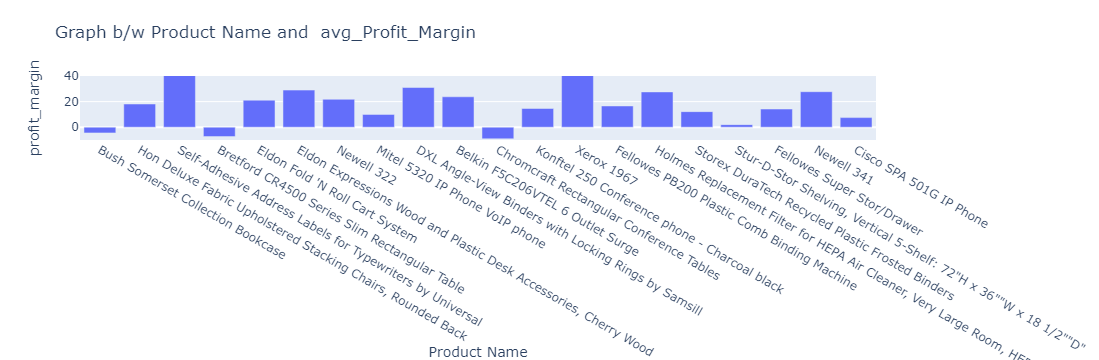

In [25]:
fig=px.bar(df3.head(20),x="Product Name",y="profit_margin",range_y=[-10,40],title="Graph b/w Product Name and  avg_Profit_Margin",height=500)
fig.show()

In [41]:
df8=pd.read_sql(''' select Category ,`Sub-Category`,round(sum(Profit),2) as total_Profit
                        from superstore group by Category,`Sub-Category` ''',mydb)
df8

C:\Users\lenovo\AppData\Local\Temp\ipykernel_5816\1443678444.py:1: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



Category Sub-Category  total_Profit
0         Furniture    Bookcases      -3472.56
1         Furniture       Chairs      26590.17
2   Office Supplies       Labels       5546.25
3         Furniture       Tables     -17725.48
4   Office Supplies      Storage      21527.91
5         Furniture  Furnishings      11588.64
6   Office Supplies          Art       6527.79
7        Technology       Phones      44447.88
8   Office Supplies      Binders      29983.02
9   Office Supplies   Appliances      18138.01
10  Office Supplies        Paper      32712.17
11       Technology  Accessories      41936.64
12  Office Supplies    Envelopes       6460.87
13  Office Supplies    Fasteners        942.44
14  Office Supplies     Supplies      -1348.57
15       Technology     Machines       3384.76
16       Technology      Copiers      55617.82

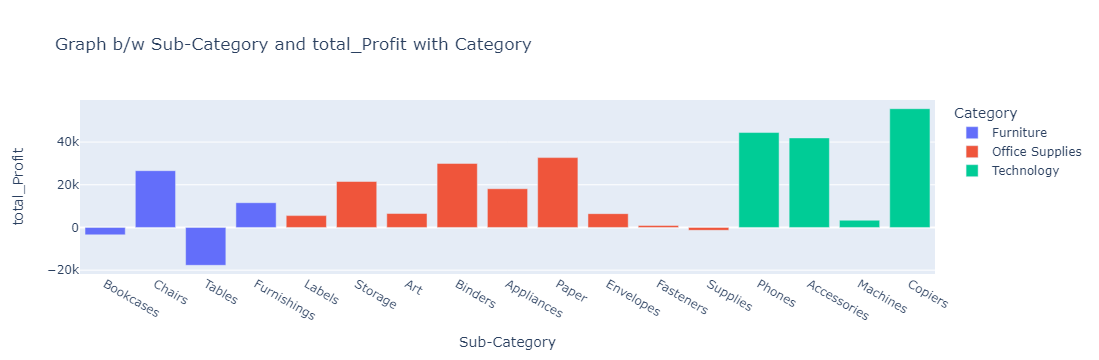

In [43]:
fig=px.bar(df8,x="Sub-Category",y="total_Profit",color="Category",title="Graph b/w Sub-Category and total_Profit with Category",height=500)
fig.show()

### Customer Analysis

In [44]:
df9=pd.read_sql('''select `Customer Name`,`Customer ID`, round(sum(Sales),2) as total_purchase from superstore 
                group by `Customer ID` , `Customer Name`
                order by total_purchase desc limit 10''',mydb)
df9

C:\Users\lenovo\AppData\Local\Temp\ipykernel_5816\447364801.py:1: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



Customer Name Customer ID  total_purchase
0         Sean Miller    SM-20320        25043.05
1        Tamara Chand    TC-20980        19017.85
2        Raymond Buch    RB-19360        15117.34
3        Tom Ashbrook    TA-21385        14595.62
4       Adrian Barton    AB-10105        14355.61
5        Sanjit Chand    SC-20095        14142.33
6        Ken Lonsdale    KL-16645        14071.92
7        Hunter Lopez    HL-15040        12873.30
8        Sanjit Engle    SE-20110        12209.44
9  Christopher Conant    CC-12370        12129.07

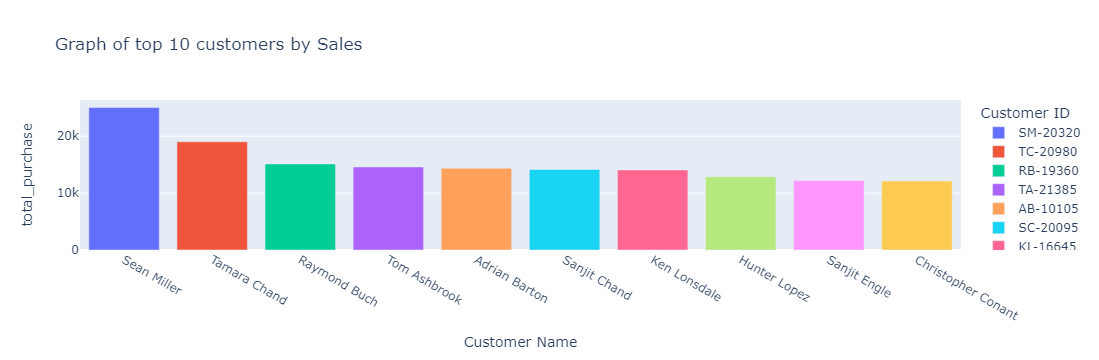

In [46]:
fig=px.bar(df9,x="Customer Name",y="total_purchase",color='Customer ID',title="Graph of top 10 customers by Sales",height=500)
fig.show()

In [47]:
df10=pd.read_sql('''select `Customer Name`,`Customer ID`, round(sum(Profit),2) as total_profit 
				from superstore 
                group by `Customer ID` , `Customer Name`
                order by total_profit desc limit 10''',mydb)

df10

C:\Users\lenovo\AppData\Local\Temp\ipykernel_5816\2020051710.py:1: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



Customer Name Customer ID  total_profit
0          Tamara Chand    TC-20980       8964.48
1          Raymond Buch    RB-19360       6976.10
2          Sanjit Chand    SC-20095       5757.41
3          Hunter Lopez    HL-15040       5622.43
4         Adrian Barton    AB-10105       5438.91
5          Tom Ashbrook    TA-21385       4703.79
6  Christopher Martinez    CM-12385       3899.89
7         Keith Dawkins    KD-16495       3038.63
8           Andy Reiter    AR-10540       2884.62
9         Daniel Raglin    DR-12940       2869.08

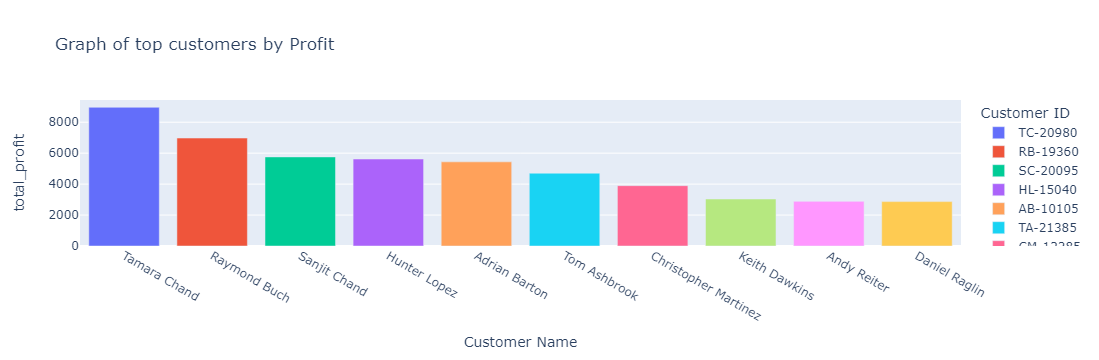

In [49]:
fig=px.bar(df10,x="Customer Name",y="total_profit",color='Customer ID',title="Graph of top customers by Profit",height=500)
fig.show()

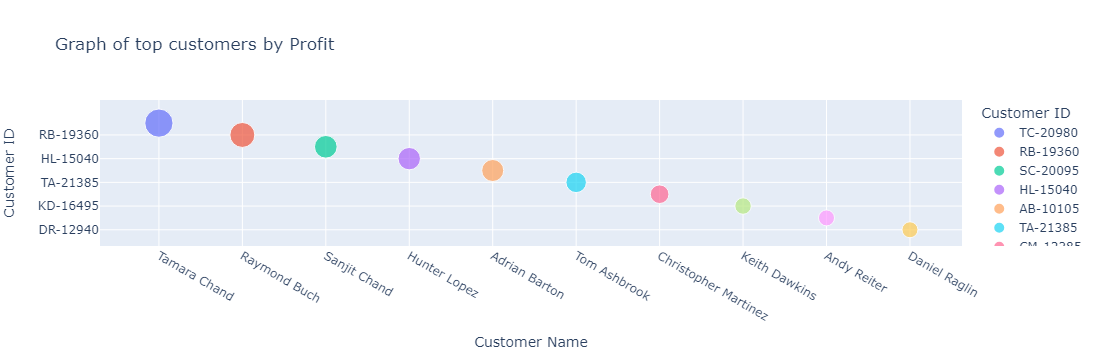

In [52]:
fig=px.scatter(df10,x="Customer Name",y="Customer ID",color="Customer ID",size='total_profit',title="Graph of top customers by Profit",height=500)
fig.show()

### Order Analysis

In [53]:
df11=pd.read_sql('''select `Customer Name`, count(`Order ID`) as Order_count
				from superstore 
                group by `Customer ID` , `Customer Name`
                order by Order_count desc limit 10''',mydb)
df11

C:\Users\lenovo\AppData\Local\Temp\ipykernel_5816\3290215646.py:1: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



Customer Name  Order_count
0        William Brown           34
1             John Lee           33
2         Matt Abelman           33
3           Paul Prost           32
4  Chloris Kastensmidt           32
5         Edward Hooks           31
6           Emily Phan           31
7       Arthur Prichep           31
8          Seth Vernon           30
9     Jonathan Doherty           30

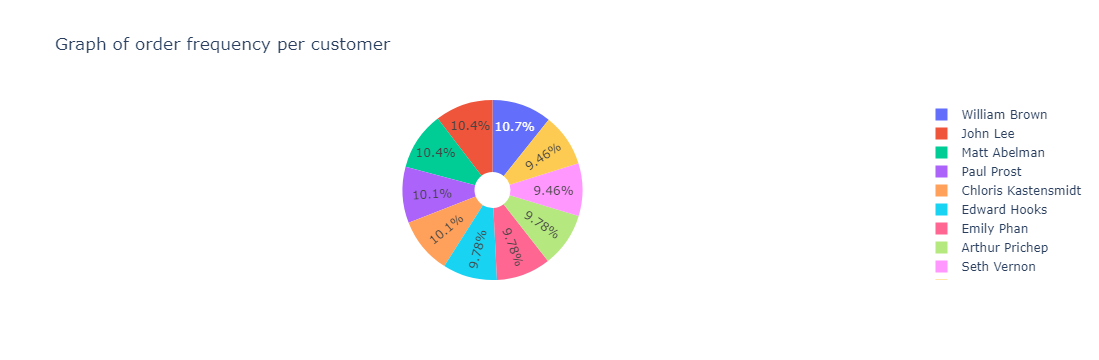

In [56]:
fig=px.pie(df11,names='Customer Name',values='Order_count',width=600,hole=0.2,title="Graph of order frequency per customer")
fig.show()

In [55]:
df12=pd.read_sql('''select `Customer Name`, count(`Order ID`) as Order_count,
                 round(avg(Sales),2) as avg_purchase
				from superstore 
                group by `Customer ID` , `Customer Name`
                order by avg_purchase desc limit 10''',mydb)
df12

C:\Users\lenovo\AppData\Local\Temp\ipykernel_5816\1362843265.py:1: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



Customer Name  Order_count  avg_purchase
0    Mitch Willingham            3       1751.29
1        Tamara Chand           11       1728.90
2         Sean Miller           15       1669.54
3      Grant Thornton            6       1558.54
4        Tom Ashbrook           10       1459.56
5        Hunter Lopez           11       1170.30
6        Bill Shonely            9       1166.85
7  Christopher Conant           11       1102.64
8   Stefanie Holloman            2       1048.20
9       Ionia McGrath            3        949.45

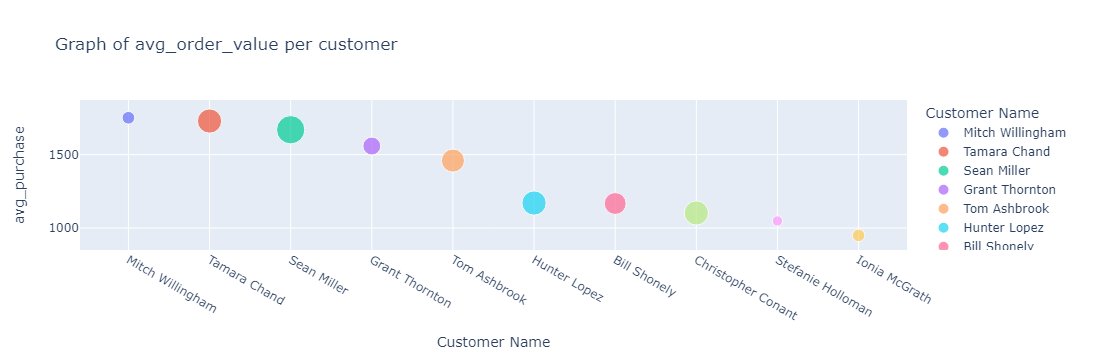

In [57]:
fig=px.scatter(df12,x="Customer Name",y="avg_purchase",color="Customer Name",
               size='Order_count',title="Graph of avg_order_value per customer ",height=500)
fig.show()

### Product Analysis

In [61]:
df13=pd.read_sql('''select `Product Name`, `Product ID`, Count(`Product ID`) as avg_profit
					from superstore  group by `Product Name`, `Product ID`
                    order by avg_profit desc limit 10''',mydb)

df13

C:\Users\lenovo\AppData\Local\Temp\ipykernel_5816\1960830235.py:1: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



Product Name       Product ID  \
0  Logitech 910-002974 M325 Wireless Mouse for We...  TEC-AC-10003628   
1         Situations Contoured Folding Chairs, 4/Set  FUR-CH-10002647   
2          Global High-Back Leather Tilter, Burgundy  FUR-CH-10002880   
3    Global Wood Trimmed Manager's Task Chair, Khaki  FUR-CH-10003774   
4  GBC Premium Transparent Covers with Diagonal L...  OFF-BI-10001524   
5                 Ibico Plastic Spiral Binding Combs  OFF-BI-10000977   
6         Kingston Digital DataTraveler 16GB USB 2.0  TEC-AC-10003038   
7                           Avery File Folder Labels  OFF-LA-10001613   
8                             GBC Instant Report Kit  OFF-BI-10000301   
9                  ACCOHIDE 3-Ring Binder, Blue, 1""  OFF-BI-10004970   

   avg_profit  
0          15  
1          15  
2          14  
3          14  
4          14  
5          13  
6          13  
7          13  
8          13  
9          13

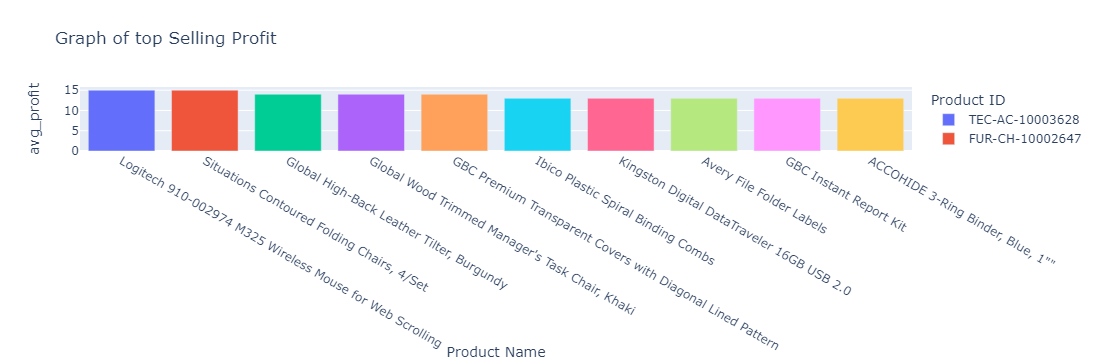

In [62]:
fig=px.bar(df13,x="Product Name",y="avg_profit",color='Product ID',title="Graph of top Selling Profit",height=500)
fig.show()

In [41]:
df4= pd.read_sql('''with cte as (select year(`Order Date`) as order_year , date_format(`Order Date`,"%M") as order_month,
	round(sum(Sales),2) as total_sales from Superstore 
    group by order_year,order_month)
    
    select order_month,
          sum(case when order_year=2011 then total_sales else 0 end) as '2011',
          sum(case when order_year=2012 then total_sales else 0 end) as '2012',
          sum(case when order_year=2013 then total_sales else 0 end) as '2013'
	from cte
    group by order_month''',mydb)
df4

C:\Users\lenovo\AppData\Local\Temp\ipykernel_6956\4240322590.py:1: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



order_month      2011      2012      2013
0     November  78297.24  74699.03  81268.62
1         June  34509.00  24659.68  38714.10
2      October  31394.94  31382.16  54893.84
3        April  28139.56  32640.48  39085.69
4     December  69379.84  74478.48  96280.08
5          May  23634.67  29325.97  56160.67
6       August  27603.51  36380.93  33164.59
7         July  33500.87  28524.52  38286.80
8    September  81496.81  63704.30  71348.30
9      January  13870.68  18085.12  18432.59
10       March  55526.20  38361.84  50302.89
11    February   4410.48  12183.73  22595.31

In [27]:
df5= pd.read_sql('''select year(`Order Date`) as order_year , date_format(`Order Date`,"%M") as order_month,
	round(sum(Sales),2) as total_sales from Superstore group by order_year,order_month''',mydb)
df5

C:\Users\lenovo\AppData\Local\Temp\ipykernel_5816\79278853.py:1: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



order_year order_month  total_sales
0         2013    November     81268.62
1         2013        June     38714.10
2         2012     October     31382.16
3         2011        June     34509.00
4         2014       April     39611.06
5         2013    December     96280.08
6         2012    November     74699.03
7         2011    November     78297.24
8         2011         May     23634.67
9         2011      August     27603.51
10        2014        July     47654.40
11        2012   September     63704.30
12        2013     January     18432.59
13        2014     October     77547.56
14        2012    December     74478.48
15        2014   September     89121.14
16        2013        July     38286.80
17        2013       March     50302.89
18        2011     October     31394.94
19        2012       April     32640.48
20        2011    December     69379.84
21        2013   September     71348.30
22        2014    December     87872.90
23        2014    November    111262.03
24        2014         May     45485.48
25        2013       April     39085.69
26        2012     January     18085.12
27        2014        June     47520.58
28        2013      August     33164.59
29        2012       March     38361.84
30        2011   September     81496.81
31        2014    February     20244.70
32        2013     October     54893.84
33        2012         May     29325.97
34        2011       March     55526.20
35        2013         May     56160.67
36        2012    February     12183.73
37        2012      August     36380.93
38        2012        July     28524.52
39        2011        July     33500.87
40        2011       April     28139.56
41        2014       March     53775.83
42        2014      August     61038.61
43        2012        June     24659.68
44        2014     January     44592.05
45        2011    February      4410.48
46        2011     January     13870.68
47        2013    February     22595.31

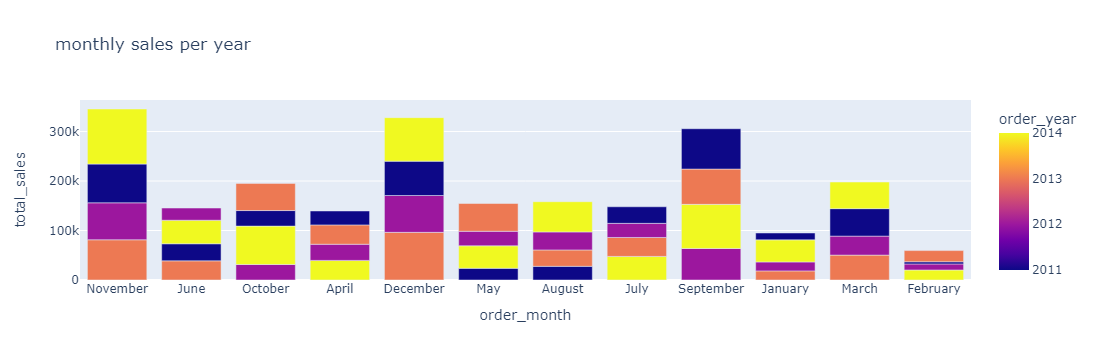

In [28]:
fig = px.bar(df5, x='order_month', y='total_sales', color='order_year', barmode= 'group' ,title='monthly sales per year')
fig.show()

In [29]:
df6=pd.read_sql('''with cte as (select date_format(`Order Date`,"%M-%Y") as month_year,Category,round(sum(Sales),2) as total_Sales
from superstore group by Category,month_year)

select Category,month_year,total_Sales from (select *,
dense_rank() over(partition by Category order by total_Sales desc) as rnk
 from cte) as cte2
where rnk=1''',mydb)

df6

C:\Users\lenovo\AppData\Local\Temp\ipykernel_5816\2698549100.py:1: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



Category     month_year  total_Sales
0        Furniture  December-2013     36557.98
1  Office Supplies  December-2013     37665.53
2       Technology  November-2014     49329.55

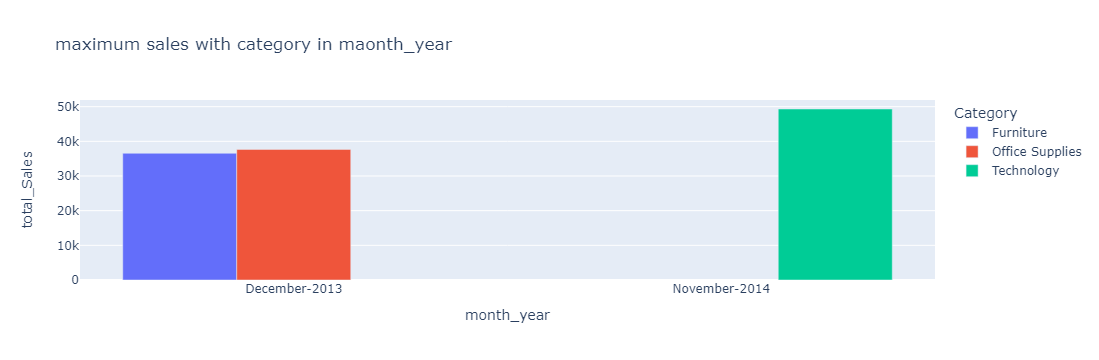

In [34]:
fig = px.bar(df6, x='month_year', y='total_Sales', color='Category',barmode= 'group' ,title='maximum sales with category in maonth_year')
fig.show()

In [5]:
df7=pd.read_sql('''with cte2 as
(with cte as (select date_format(`Order Date`,"%Y") as order_year,`Sub-Category`,round(sum(Sales),2) as total_Sales
from superstore group by `Sub-Category`,order_year order by `Sub-Category` )

 (select `Sub-Category`,
          sum(case when order_year=2011 then total_sales else 0 end) as '2011',
          sum(case when order_year=2012 then total_sales else 0 end) as '2012',
          sum(case when order_year=2013 then total_sales else 0 end) as '2013',
          sum(case when order_year=2014 then total_sales else 0 end) as '2014'
	from cte 
    group by `Sub-Category`))
    
    select *,round(((`2012`-`2011`)/`2011`)*100,2) as growth_percent_bw_11_12
    ,round(((`2013`-`2012`)/`2012`)*100,2) as growth_percent_bw_12_13,
    round(((`2014`-`2013`)/`2013`)*100,2) as growth_percent_bw_13_14
    from cte2 order by `Sub-Category`''',mydb)

df7

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9084\1081038411.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df7=pd.read_sql('''with cte2 as


Sub-Category      2011      2012      2013       2014  \
0   Accessories  25014.27  40523.96  41895.85   59946.23   
1    Appliances  15313.62  23241.29  26050.31   42926.93   
2           Art   6057.98   6236.83   5909.65    8914.32   
3       Binders  42866.62  36693.17  48636.93   71709.00   
4     Bookcases  20036.68  38543.57  26275.47   30024.28   
5        Chairs  77241.58  71734.53  83918.64   95554.35   
6       Copiers  10849.78  26179.45  49599.41   62899.39   
7     Envelopes   3584.89   4390.23   4168.74    3195.63   
8     Fasteners    659.34    536.54    960.13     852.63   
9   Furnishings  13112.81  18981.05  25224.18   25434.18   
10       Labels   2841.39   2956.46   2827.24    3861.22   
11     Machines  62023.37  27763.70  55906.89   43544.68   
12        Paper  14363.14  14866.01  19287.71   26839.26   
13       Phones  77318.88  68301.88  78615.31  105517.02   
14      Storage  50046.59  42627.14  56363.95   67765.53   
15     Supplies  14344.47   1700.00  14059.87   15848.13   
16       Tables  46088.37  39150.42  60833.20   60893.54   

    growth_percent_bw_11_12  growth_percent_bw_12_13  growth_percent_bw_13_14  
0                     62.00                     3.39                    43.08  
1                     51.77                    12.09                    64.78  
2                      2.95                    -5.25                    50.84  
3                    -14.40                    32.55                    47.44  
4                     92.37                   -31.83                    14.27  
5                     -7.13                    16.99                    13.87  
6                    141.29                    89.46                    26.81  
7                     22.46                    -5.05                   -23.34  
8                    -18.62                    78.95                   -11.20  
9                     44.75                    32.89                     0.83  
10                     4.05                    -4.37                    36.57  
11                   -55.24                   101.37                   -22.11  
12                     3.50                    29.74                    39.15  
13                   -11.66                    15.10                    34.22  
14                   -14.83                    32.23                    20.23  
15                   -88.15                   727.05                    12.72  
16                   -15.05                    55.38                     0.10

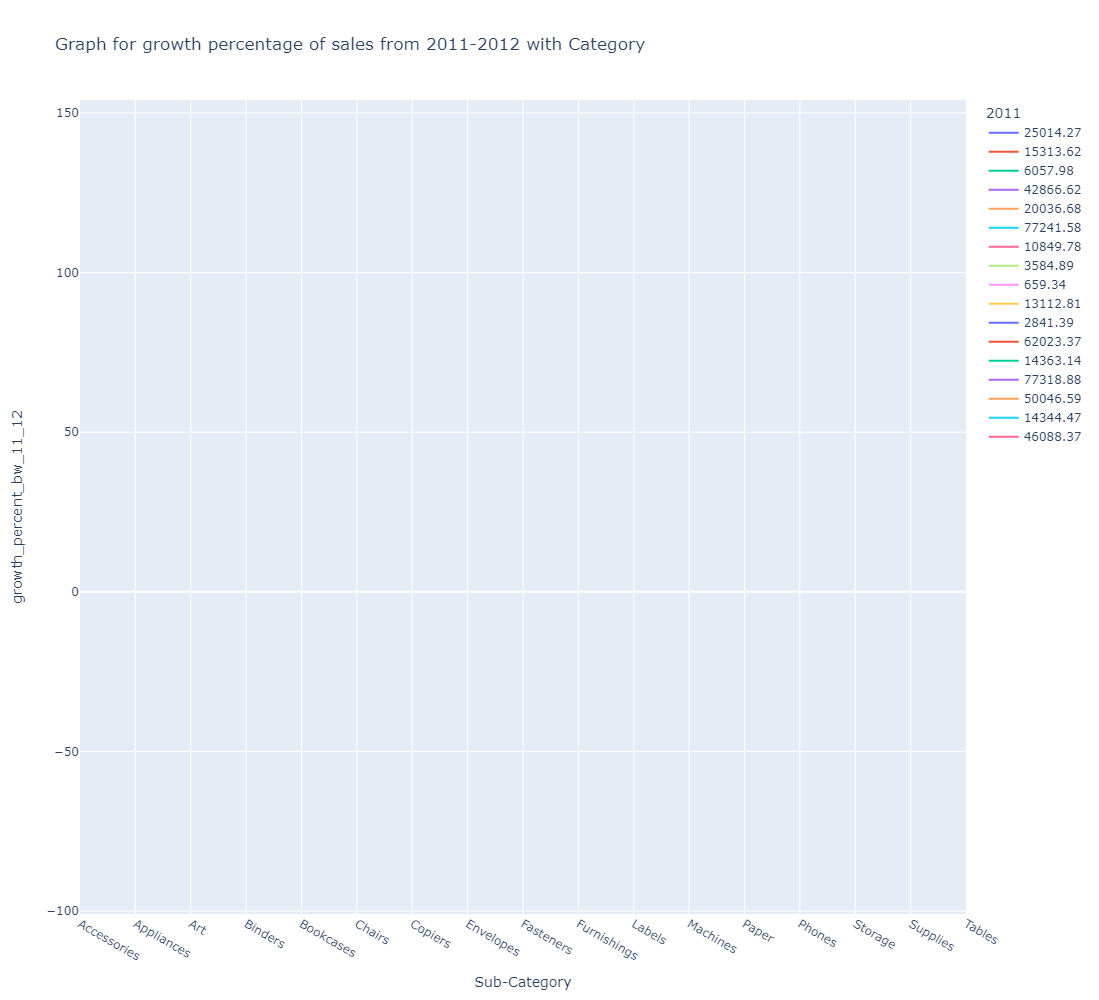

In [8]:
fig=px.line(df7,x="Sub-Category",y='growth_percent_bw_11_12',color="2011",
               title="Graph for growth percentage of sales from 2011-2012 with Category",width=1000,height=1000)
fig.show()